In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Question 0
Load the telco data file we used in Lab 3, and perform a train-test split. Now build a Random Forest model, and print the score on train and test. 

In [20]:
df=pd.read_csv("3. telco.csv")

df.head(5)



,Unnamed: 0,tenure,Partner,Dependents,gender,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,1,0,0,0,1,29.85,29.85,1,...,0,0,0,0,0,0,0,1,0,No
1,1,34,0,0,1,1,0,56.95,1889.50,0,...,0,0,0,0,1,0,0,0,1,No
2,2,2,0,0,1,1,1,53.85,108.15,0,...,0,0,0,0,0,0,0,0,1,Yes
3,3,45,0,0,1,0,0,42.30,1840.75,1,...,0,0,0,0,1,0,0,0,0,No
4,4,2,0,0,0,1,1,70.70,151.65,0,...,0,0,0,0,0,0,0,1,0,Yes


In [21]:
df.shape

(7032, 31)

In [22]:
X = df.drop(["Churn"], axis=1)  #Axis=1 = the whole column --> Sometimes we want to drop more than one columns
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, random_state=0)

print("shape of X:", X.shape)
print("\nshape of y:", y.shape)

shape of X: (7032, 30)

shape of y: (7032,)


<h2>Question 1</h2>
Build random forest models with the number of estimators ranging from 20 to 500. Write a loop where n_estimators increases 20 at each iteration, and save the train and test scores in a list. Print the results sorted by test accuracy. <i>Hint: before the loop, create two empty lists for train_scores and test_scores. With each iteration, you can use the append method to add the current scores to the train and test lists.</i>

In [58]:

from sklearn.ensemble import RandomForestClassifier



n=list(range(20,501,20))



train_scores=[]
test_scores=[]
j=0
for i in n:
    
    clf=RandomForestClassifier(n_estimators=i,random_state=0).fit(X_train,y_train)
    train_scores.append(clf.score(X_train,y_train))
    test_scores.append(clf.score(X_test,y_test))
    print ("{})  For n_estimators = {}, the train score is : {:.3f} and the test score is: {:.3f} \n".format(j+1 ,n[j], train_scores[j], test_scores[j]))
    j+=1




1)  For n_estimators = 20, the train score is : 0.996 and the test score is: 0.782 

2)  For n_estimators = 40, the train score is : 1.000 and the test score is: 0.780 

3)  For n_estimators = 60, the train score is : 1.000 and the test score is: 0.783 

4)  For n_estimators = 80, the train score is : 1.000 and the test score is: 0.790 

5)  For n_estimators = 100, the train score is : 1.000 and the test score is: 0.784 

6)  For n_estimators = 120, the train score is : 1.000 and the test score is: 0.787 

7)  For n_estimators = 140, the train score is : 1.000 and the test score is: 0.789 

8)  For n_estimators = 160, the train score is : 1.000 and the test score is: 0.786 

9)  For n_estimators = 180, the train score is : 1.000 and the test score is: 0.787 

10)  For n_estimators = 200, the train score is : 1.000 and the test score is: 0.790 

11)  For n_estimators = 220, the train score is : 1.000 and the test score is: 0.791 

12)  For n_estimators = 240, the train score is : 1.000 

In [61]:
test_scores

[0.7821387940841866,
 0.7798634812286689,
 0.7832764505119454,
 0.7895335608646189,
 0.7844141069397043,
 0.7866894197952219,
 0.7889647326507395,
 0.7861205915813424,
 0.7872582480091013,
 0.7901023890784983,
 0.7906712172923777,
 0.7872582480091013,
 0.78839590443686,
 0.7918088737201365,
 0.7918088737201365,
 0.78839590443686,
 0.7878270762229806,
 0.78839590443686,
 0.7912400455062572,
 0.7901023890784983,
 0.7906712172923777,
 0.7912400455062572,
 0.7895335608646189,
 0.7872582480091013,
 0.7866894197952219]

<h2> Question 2</h2>

Create a line plot of train and test scores for each value of the number of estimators, by completing the following code. 

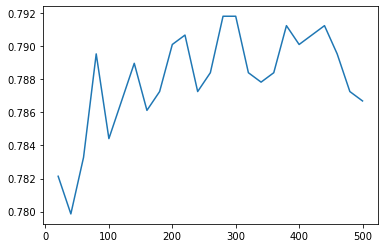

In [63]:
# first just plot test scores
# x axis - a list of the values for number of estimators
x = n
# two arguments to plot are the x axis values and the y axis values
# y axis - list of test scores
plt.plot(x, test_scores)
# finally, to show the plots
plt.show()

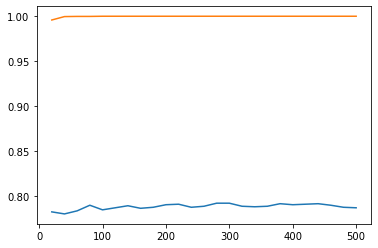

In [62]:
# now plot train and test scores
# x axis - a list of the values for number of estimators
x = n
# y axis - list of train scores
# two arguments to plot are the x axis values and the y axis values
plt.plot(x , test_scores)
# do another plot, with same x axis, and on the y axis - list of test scores
plt.plot(x,train_scores)
# finally, to show the plots
plt.show()

<h2>Question 3</h2>
 Build an MLP model, and print the score on train and test. 

<h2>Question 4</h2>
Now try mlp models with different values for the hidden layer size. Try with a single hidden layer, with sizes ranging from 1 to 100, incremented by 5. (Use the MLP parameter, hidden_layer_sizes, which takes a value as a tuple -- for a single hidden layer, just one value in parenthesis.) Save the train and test scores in two lists, and print the results, sorted by test score.

<h2>Question 5</h2>
Make a line plot of train and test scores for the mlp models with the different hidden layer sizes.

In [ ]:
# x axis - a list of the values for number of estimators
____
# y axis - list of train scores
# two arguments to plot are the x axis values and the y axis values
____
# do another plot, with same x axis, and on the y axis - list of test scores
____
# finally need to show the plots
____

<h2>Question 6</h2>
Read the HomesSoldHellerup.csv file, using read_csv (note that the separator is a semicolon and not a comma, which is the default). Display the different values for the Type feature, using value_counts. Do the same with Type of Sale.

In [ ]:
# Rearrange the code for what the question is asking for

df = pd.read_csv("4. HomesSoldHellerup.csv", sep=";" ,encoding = 'utf8')
df.head()


<h2>Question 7</h2>
We assign to X a list of the features, m2 and Build Year, and the target value y is Price, as shown below. Perform a train-test split, and then create a Linear Regression model. Print the score for train and test.

In [56]:
X=df[['m2','Build Year']]
y = df['Price']


<h2>Question 8</h2>
Add the ZipCode feature to X. Then redo the train-test split, and create a Linear Regression model. Print the score for train and test.

<h2> Question 9</h2>
Build a Random Forest regressor for this data. Set random_state, with otherwise default settings, and print train and test scores.